# Imports and installing dependancies

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset gathering

In [ ]:
dataset_url = 'https://www.kaggle.com/datasets/shayanfazeli/heartbeat'
od.download('https://www.kaggle.com/datasets/shayanfazeli/heartbeat')

100%|██████████| 98.8M/98.8M [00:02<00:00, 34.7MB/s]


In [ ]:
df = pd.read_csv('/content/heartbeat/mitbih_train.csv', header=None)
df2 = pd.read_csv('/content/heartbeat/mitbih_test.csv', header=None)

# Splitting dataset

In [ ]:
x_train = df.iloc[:,:187]
y_train = df.iloc[:,-1]

In [ ]:
x_test = df2.iloc[:,:187]
y_test = df2.iloc[:,-1]

# Model creation

In [ ]:
model = tf.keras.Sequential()
model.add( tf.keras.layers.Input(shape=[187,]))
model.add( tf.keras.layers.Flatten())
model.add( tf.keras.layers.Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add( tf.keras.layers.Dense(265, activation='relu'))
model.add(Dropout(0.4))
model.add( tf.keras.layers.Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add( tf.keras.layers.Dense(64, activation='relu'))
model.add( tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=150, batch_size=128, validation_data=(x_test, y_test), callbacks = [EarlyStopping(monitor = 'val_loss', patience = 20)])

Epoch 1/150
685/685 [==============================] - 6s 4ms/step - loss: 0.3081 - accuracy: 0.9146 - val_loss: 0.1739 - val_accuracy: 0.9506
Epoch 2/150
685/685 [==============================] - 3s 4ms/step - loss: 0.1884 - accuracy: 0.9470 - val_loss: 0.1532 - val_accuracy: 0.9557
Epoch 3/150
685/685 [==============================] - 3s 4ms/step - loss: 0.1635 - accuracy: 0.9540 - val_loss: 0.1321 - val_accuracy: 0.9635
Epoch 4/150
685/685 [==============================] - 3s 5ms/step - loss: 0.1508 - accuracy: 0.9579 - val_loss: 0.1185 - val_accuracy: 0.9670
Epoch 5/150
685/685 [==============================] - 3s 4ms/step - loss: 0.1359 - accuracy: 0.9621 - val_loss: 0.1152 - val_accuracy: 0.9676
Epoch 6/150
685/685 [==============================] - 3s 4ms/step - loss: 0.1286 - accuracy: 0.9648 - val_loss: 0.1045 - val_accuracy: 0.9704
Epoch 7/150
685/685 [==============================] - 3s 4ms/step - loss: 0.1228 - accuracy: 0.9655 - val_loss: 0.1045 - val_accuracy: 0.9709

#Evaluation

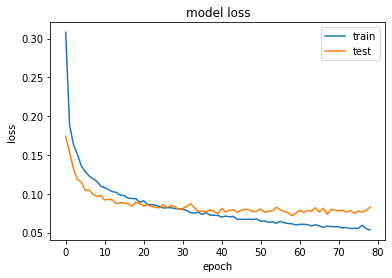

In [ ]:
def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

plot_train_history_loss(history)